# Reference
http://web.math.ku.dk/~rolf/HaganWest.pdf

In [3]:
import sys
# Add the calibration folder path to the sys.path list
sys.path.append('../calibration')
sys.path.append('../data')

from scipy import interpolate
from get_US_yieldCurve import *
from tools import *
pd.set_option('display.float_format', lambda x: '%.5f' % x)# pickle_in = open("../data/cleaned_data","rb")
np.set_printoptions(precision=4, suppress=True)

         0
0 34.98775


In [186]:
from tqdm import tqdm

In [8]:
import matplotlib.pyplot as plt

In [9]:
oneday = parse_result.loc[parse_result.date_string == '2013-05-13',:]

In [115]:
terms = parse_result.loc[:,'term'].unique()
terms_year = [3/12, 6/12, 1,2,3,5,7,10,20,30,30,1/12]

In [117]:
for i in zip(terms, terms_year):
    print(i)

BC_3MONTH
BC_6MONTH
BC_1YEAR
BC_2YEAR
BC_3YEAR
BC_5YEAR
BC_7YEAR
BC_10YEAR
BC_20YEAR
BC_30YEAR
BC_30YEARDISPLAY
BC_1MONTH


In [132]:
a = pd.DataFrame({'terms_year':terms_year, 'term':terms})
parse_result = parse_result.merge(a)

In [135]:
parse_result.date_string = parse_result.date_string.apply(lambda x: x.replace('-',''))

In [145]:
# Remove BC_30YEARDISPLAY
parse_result = parse_result.loc[parse_result.term != "BC_30YEARDISPLAY",:]	

# Sort by terms
parse_result = parse_result.sort_values(by=['date_string', 'terms_year'])

In [154]:
parse_result

,term,date_string,yield,dt,terms_year
197,BC_3MONTH,19960102,5.20000,1996-01-02,0.25000
5701,BC_6MONTH,19960102,5.25000,1996-01-02,0.50000
11208,BC_1YEAR,19960102,5.17000,1996-01-02,1.00000
16715,BC_2YEAR,19960102,5.18000,1996-01-02,2.00000
22222,BC_3YEAR,19960102,5.26000,1996-01-02,3.00000
...,...,...,...,...,...
33038,BC_5YEAR,20171229,2.20000,2017-12-29,5.00000
38545,BC_7YEAR,20171229,2.33000,2017-12-29,7.00000
44052,BC_10YEAR,20171229,2.40000,2017-12-29,10.00000
49559,BC_20YEAR,20171229,2.58000,2017-12-29,20.00000


In [155]:
oneday = parse_result.loc[parse_result.date_string == '20130513',:]

In [172]:

x = np.array([0] + list(oneday.terms_year)) # 0 term 0 interest rate
y = np.array([0] + list(oneday.loc[:,'yield'])) 
f = interpolate.interp1d(x=x, y=y, kind='cubic')


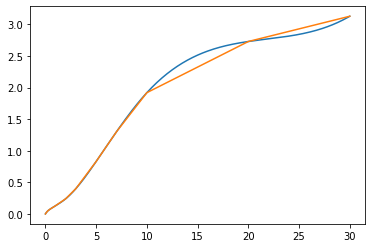

In [177]:
year=30
x_test = np.arange(0,year+0.1,0.1)
plt.plot(x_test, f(x_test))
plt.plot(x[x<=year],y[x<=year])

In [179]:
def make_cubic_interpolation(df, verbose=0, year_plot = 30):
    x = np.array([0] + list(df.terms_year)) # 0 term 0 interest rate
    y = np.array([0] + list(df.loc[:,'yield'])) 
    f = interpolate.interp1d(x=x, y=y, kind='cubic')
    if verbose > 0:
        x_test = np.arange(0,year_plot+0.1,0.1)
        plt.plot(x_test, f(x_test))
        plt.plot(x[x<=year_plot],y[x<=year_plot])
    
    return f

In [187]:
dates = parse_result.date_string.unique()

result = {}

for d in tqdm(dates):
    oneday = parse_result.loc[parse_result.date_string == d,:]

    result[d]=make_cubic_interpolation(oneday)

100%|██████████| 5507/5507 [00:21<00:00, 252.53it/s]


In [190]:
result['20130513'](1)

array(0.13)

In [193]:
import pickle 
pickle_out = open("../data/US_yieldCurve_interpolatedFunction","wb")
pickle.dump(result, pickle_out)
pickle_out.close()

In [107]:
0.26-f(1.6)

In [109]:
0.12 - f(0.85)

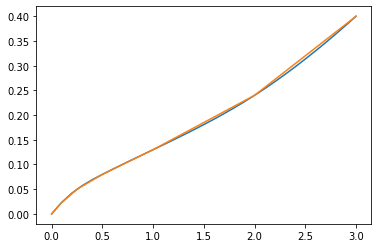

In [100]:
year=3
x_test = np.arange(0,year+0.1,0.1)
plt.plot(x_test, f(x_test))
plt.plot(x[x<=year],y[x<=year])